## Sequential Model

- 이전 데이터를 참고로 다음 데이터를 예측
- 과거의 고려해야하는 정보들이 점점 늘어감
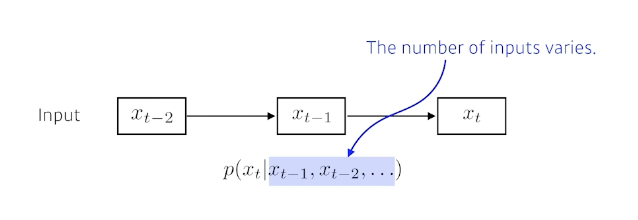

### Autoregressive model
- 참고할 과거의 데이터 개수를 지정
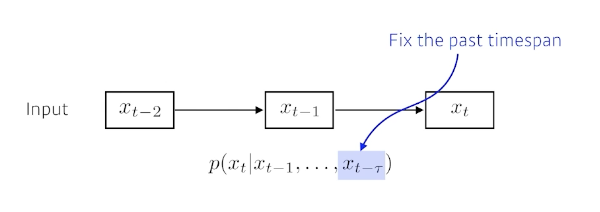

### Markov model(first-order autoregressive model)
- 가정 : 나의 현재는 바로 전 과거에만 의존함
- 많은 정보를 버리게 됨
- 장점 : joint distribution을 표현하기 쉬움
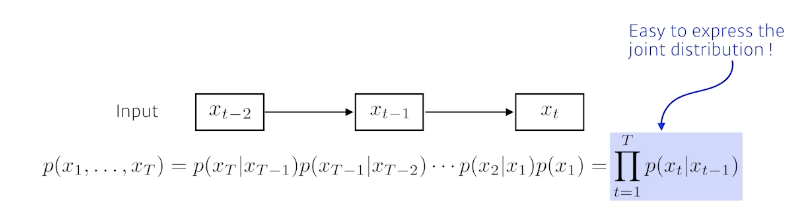

### Laten autoregressive model
- Markov model의 단점 : 과거의 아주 많은 정보를 활용하지 못함
- 중간에 hidden state가 존재 
- hidden state가 과거의 정보를 요약하고있음
- output은 hidden state를 활용해서 출력
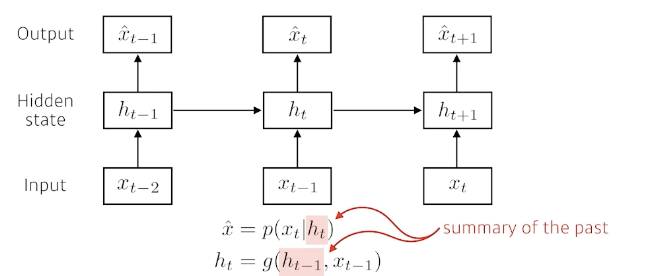

## Recurrent Neural Network(RNN)
- 자기 자신으로 돌아오는 구조가 존재
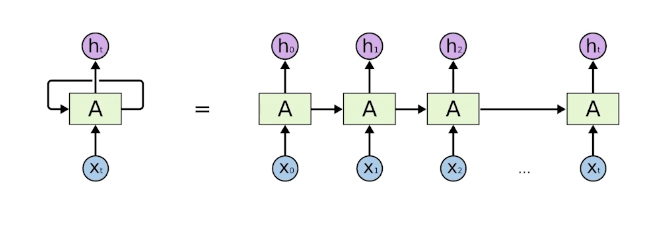

### Short-term dependencies
- RNN의 가장 큰 단점 : 과거의 모든 정보를 취함해서 미래를 예측해야하지만 RNN은 정보를 계속 취합하기 때문에 먼 과거의 데이터가 미래까지 영향을 미치기 힘듦
- 몇 스탭전의 자료는 고려가 잘 되지만 많은 스텝의 자료는 고려되기 힘듦


#### RNN의 학습이 어려운 이유
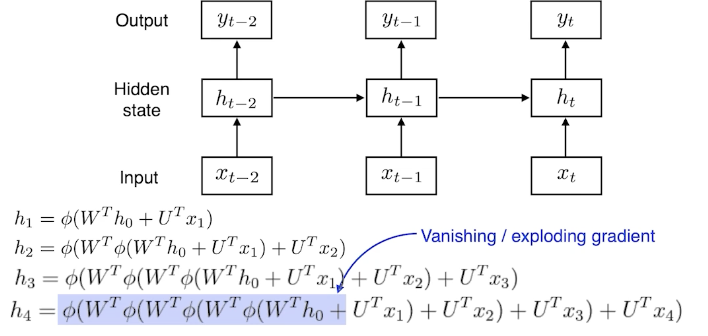
- activation이 sigmoid : 값을 계속 곱하다보면 값이 너무 잣아지는 문제가 나타남, 정보가 중간에 죽어버림
- activation이 ReLu : 값이 양수라면 아주 커짐, 네트워크가 폭발

## LSTM(Long Short Term Memory)
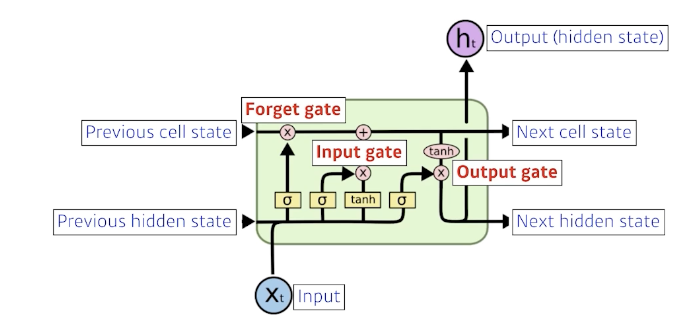
- 3개의 gate

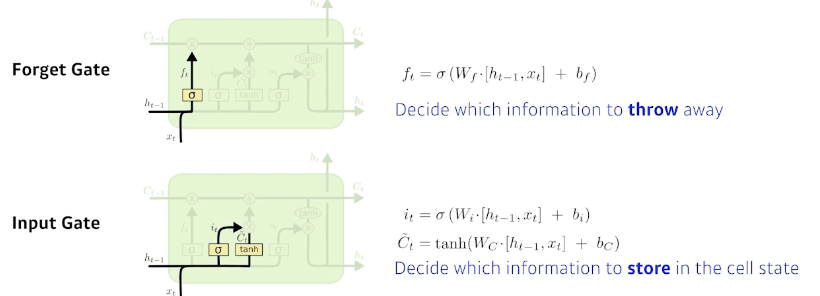
- forget gate : 어떤 정보를 버릴지 결정 
    - 입력 : 현재의 입력, 이전의 output 
    - 출력 : 시그모이드를 사용해 항상 0~1의 값
- input gate : 입력이 들어왔을 때 어떤 정보를 올릴지 결정
    - i t : 현재의 정보와 이전의 정보로 만들어짐(어떤정보를 추가할지에 대한 정보)

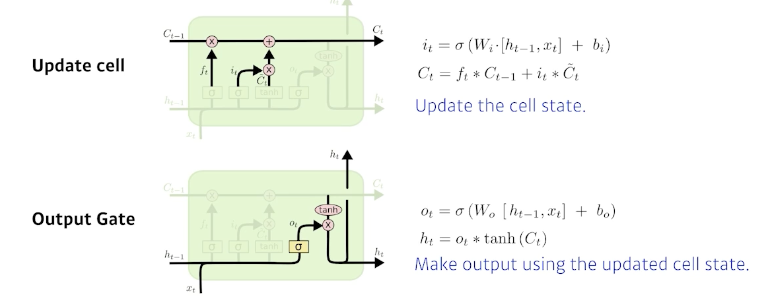
- update cell : 버릴 값은 버리고, 현재정보 기준으로 추가할 것은 업데이트 
- output gate : 어떤것을 내보낼지

## Gated Recurrent Unit(GRU)
- 2개의 gate
- cell status가 없음
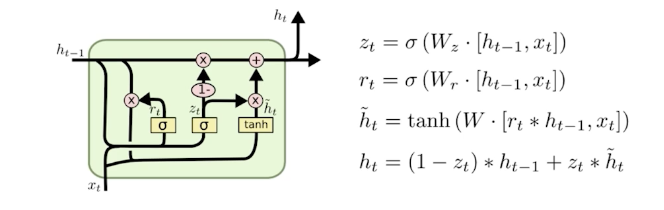

# Transformer

- sequence to sequence model
- 변역

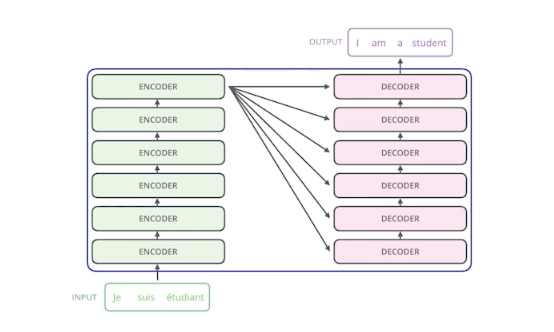
- 입력과 출력의 sequence 단어가 다를 수 있음
- 입력과 출력의 도메인이 다를 수 있음
- encoder 부분은 무수히 많은 수의 단어가 들어가도 1에 처리
- 동일한 구조를 갖지만 network 파라미터가 다르게 학습된 encoder와 decoder가 stack되어있음

1. n개의 단어가 어떻게 encoder에서 한번에 처리가 되는지
2. decoder와 encoder사이에 어떤 정보를 주고받는지
3. decoder가 어떻게 ganeration하는지

### encoder
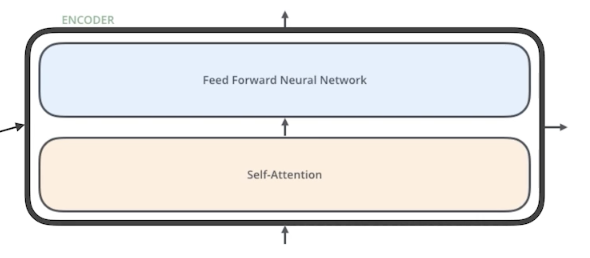
- self-attention 과 feed forword neural net를 하나씩 거치는게 하나의 encoder

1) n개의 단어가 들어오고 각 단어마다 특정 숫자의 벡터로 표현
    - self-attention이 각 단어마다 벡터를 찾아줌
    - self-attention은 n개의 단어를 n개의 벡터로 변환할 때 n-1개의 다른 단어의 정보들도 반영함
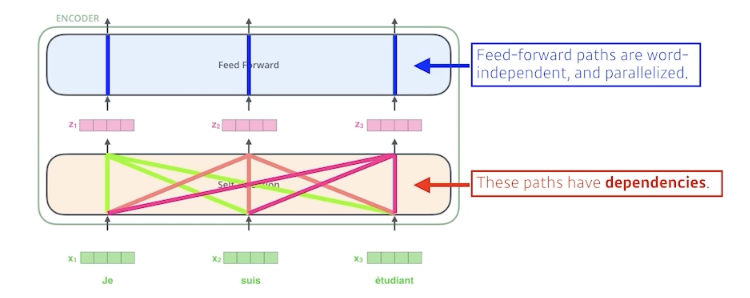
    - feed-forword는 dependent가 없음

    - 2개의 단어가 주어지게 되면 3개의 벡터를 만들어낸다 (= 3개의 neurel net)
    - 한 단어마다 3개의 벡터
    
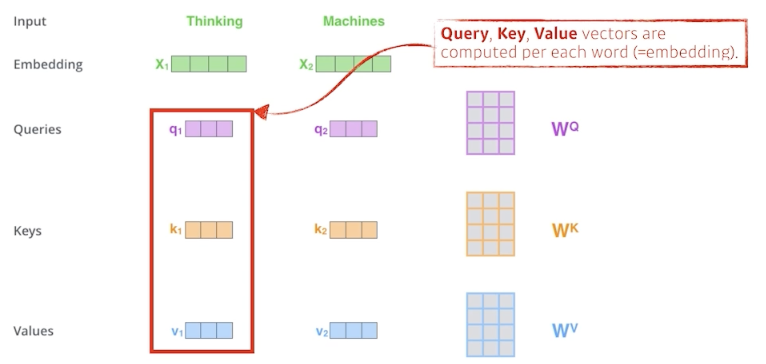

    - score 벡터는 구하고자 하는 단어의 Queries벡터와 나머지 n-1개의 key벡터를 내적(인코딩하고자 하는 단어와 다른 단어간 관계의 유사도)
    - Divide는 key를 몇 차원으로 만들지의 값에 1/2승값 으로 score을 나눠준 값
    - softmax 를 통과시켜 값을 구해 유사도를 구함
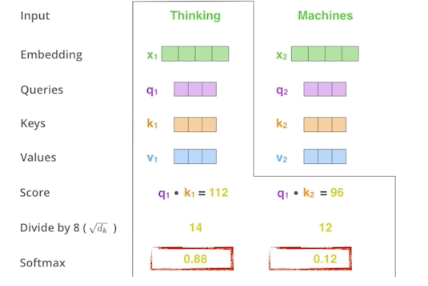

    - softmax를 통해 얻은 값과 value 벡터를 weighted sum을 해준것이 최종적으로 나오는 단어의 encording 벡터를 구함
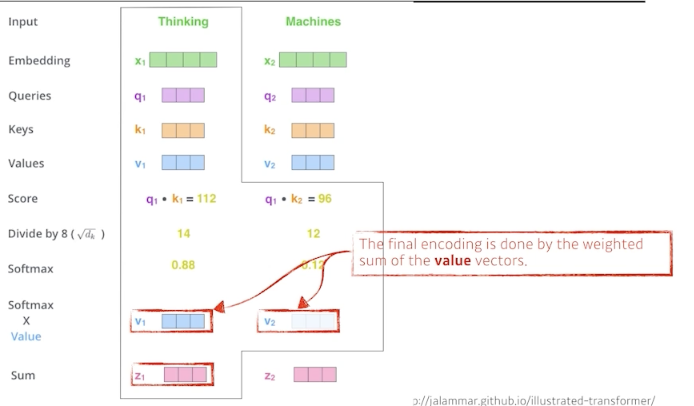

- n개의 단어를 처리하기 위해선 n x n의 attention map이 필요 => 단어가 많아지면 n^2에 비례하기 때문에 한계에 부딪힘


position encoding 
- 입력에 특정값을 더해주는것
- 필요한 이유
    - 문장에는 단어의 순서가 중요
    - 순서에 따라서 값을 다르게 해주기 위함